In [185]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import sys
from scipy.interpolate import interp1d
sys.path.append('../../py/')

from cosmoSim import cosmoSim

In [186]:
matplotlib.rc('xtick', labelsize=24)
matplotlib.rc('ytick', labelsize=24)
matplotlib.rcParams['font.size']=24

ALPHA=1
FIGSIZE=[28,12]
DPI=300

snap_no = 7

In [187]:
outpath = '../../plots/plots_L3N256_vkick/'

try:
    os.mkdir(outpath)
except:
    print(f'{outpath} already exists!')

tcDM_search = '../../data_prods/run_2cDM_L3N256_DM_powerm2m2*Vkick*'

CDM_runs = [ 'run_CDM_L3N256_DM' ]

tcDM_runs = [ os.path.basename(x) for x in sorted(glob.glob(tcDM_search)) ]
tcDM_runs.append('run_2cDM_L3N256_DM_powerm2m2_sigma1')

runs = CDM_runs + tcDM_runs


../../plots/plots_L3N256_vkick/ already exists!


In [188]:
tcDM_runs

['run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_0_Vkick20.00',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_1_Vkick25.83',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_2_Vkick33.36',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_3_Vkick43.09',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_4_Vkick55.65',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_5_Vkick71.88',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_6_Vkick92.83',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_7_Vkick119.90',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_8_Vkick154.85',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_9_Vkick200.00',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1']

In [189]:
def wnumber2wlength(k):
    return 1/k
def wlength2wnumber(l):
    return 1/l    

In [190]:
Vkicks = [ cosmoSim(x).Vkick for x in tcDM_runs ]

c_norm = matplotlib.colors.LogNorm(vmin=np.amin(Vkicks), vmax=np.amax(Vkicks))
c_map = matplotlib.cm.plasma

s_map = matplotlib.cm.ScalarMappable(cmap=c_map, norm=c_norm)

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')


../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')


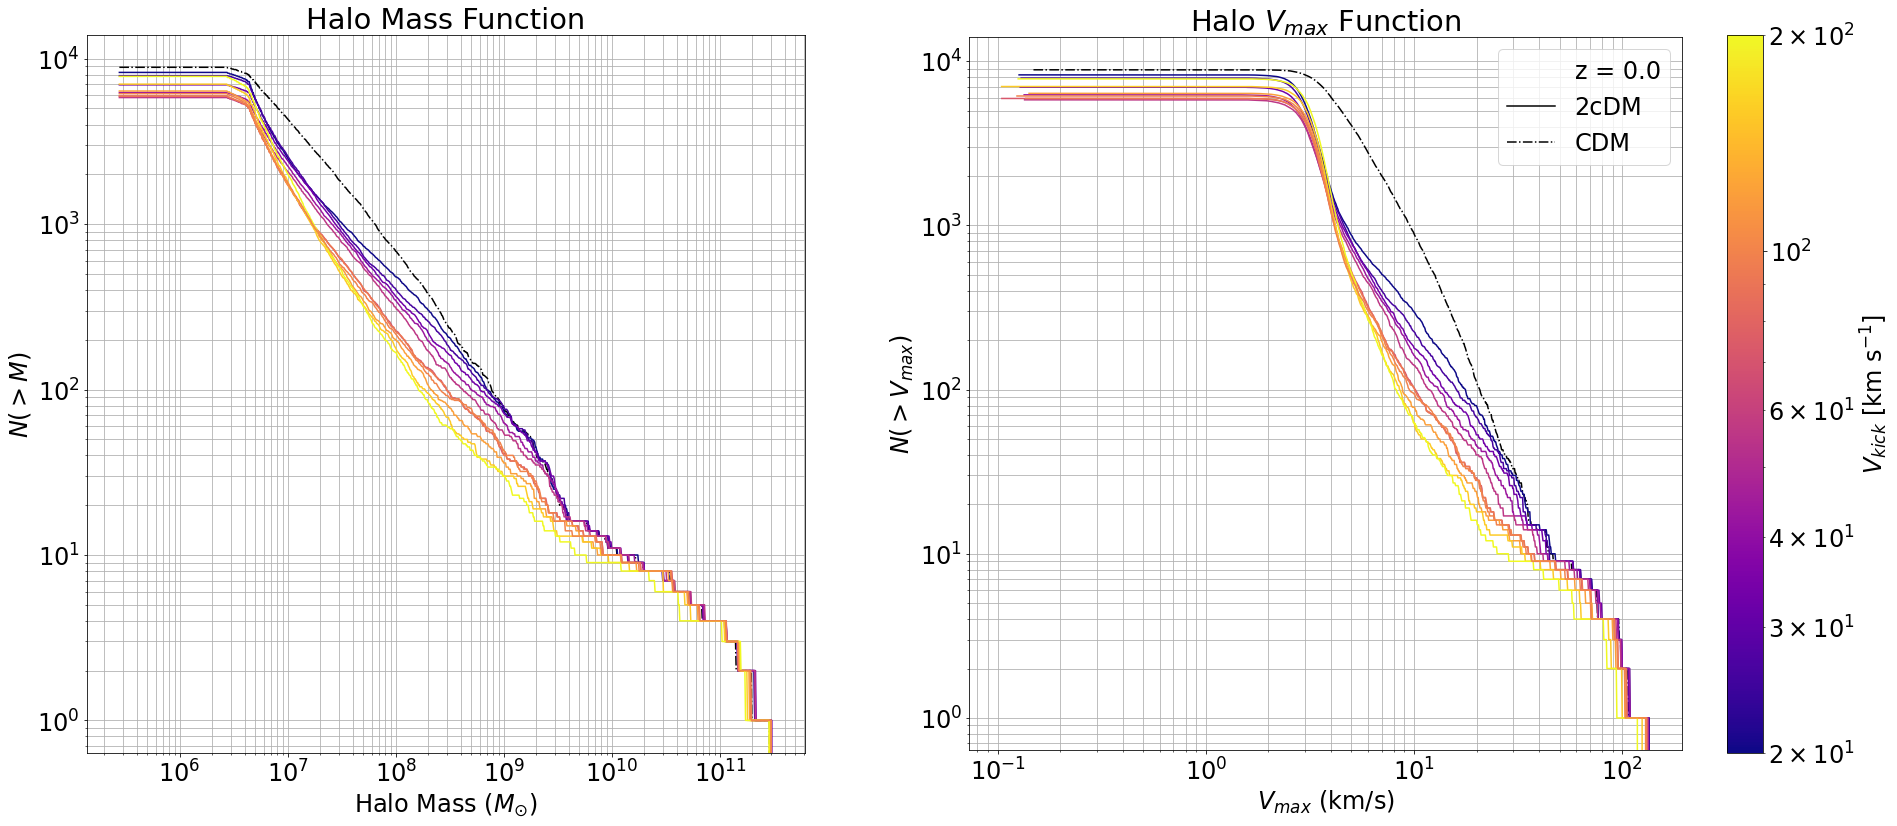

In [191]:
fig, ax = plt.subplots(1, 2, figsize=FIGSIZE)

for i, run_n in enumerate(runs):

    run = cosmoSim(run_n)

    mbins, m = run.load_mass_profile(run.redshifts[snap_no])
    vbins, v = run.load_vel_profile(run.redshifts[snap_no])
    if run.dm_type == '2cDM':
        ax[0].plot(mbins, m, alpha=ALPHA, color=s_map.to_rgba(run.Vkick))
        ax[1].plot(vbins, v, alpha=ALPHA, color=s_map.to_rgba(run.Vkick))
    else:
        ax[0].plot(mbins, m, alpha=ALPHA, color='k', linestyle='dashdot')
        ax[1].plot(vbins, v, alpha=ALPHA, color='k', linestyle='dashdot')
ax[0].set_xlabel("Halo Mass ($M_{\odot}$)")
ax[0].set_ylabel("$N\\left(>M\\right)$")
ax[0].set_title("Halo Mass Function")

ax[1].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax[1].plot([],[], '-', label='2cDM', color='k')
ax[1].plot([],[], label='CDM', color='k', linestyle='dashdot')

ax[1].set_xlabel("$V_{max}$ (km/s)")
ax[1].set_ylabel("$N\\left(>V_{max}\\right)$")
ax[1].set_title('Halo $V_{max}$ Function')

ax[1].legend()

for a in ax:
    a.set_yscale("log")
    a.set_xscale("log")
    a.grid(True, which="both", ls="-")
    a.set_box_aspect(aspect=1)

fig.colorbar(s_map, label='$V_{kick}$ [km s$^{-1}$]')
fig.tight_layout()
plt.savefig(outpath + f'z_{run.redshifts[snap_no]}_both_profiles.png', dpi=DPI)
plt.show()

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')


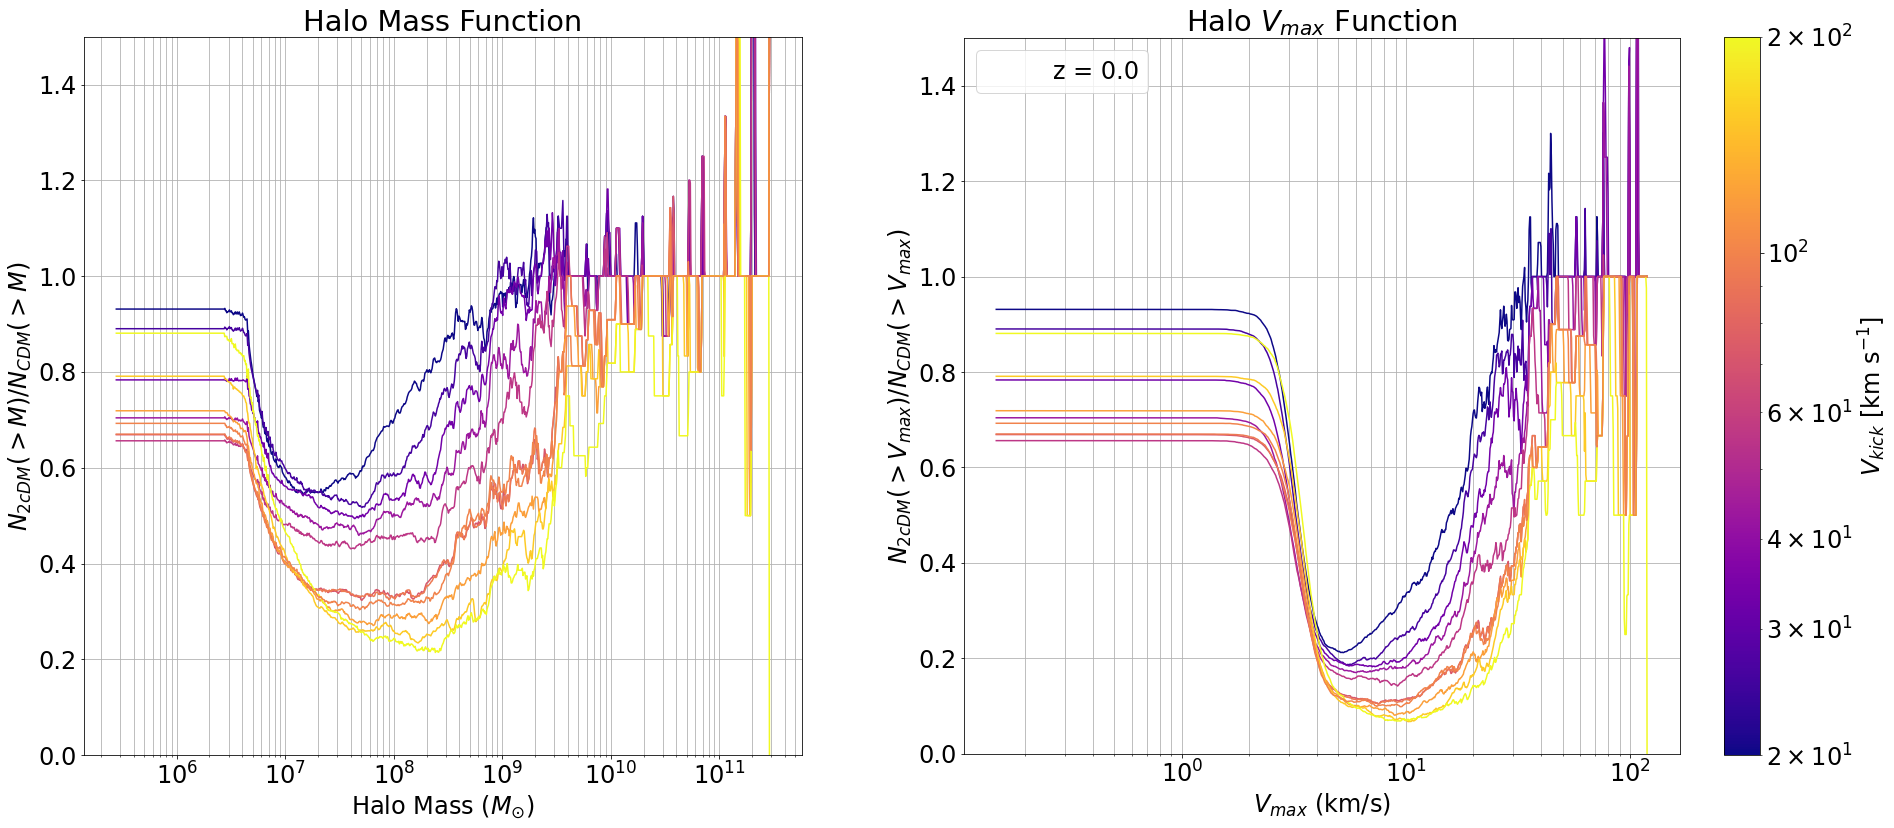

In [192]:
fig, ax = plt.subplots(1, 2, figsize=FIGSIZE)


cdm_run = cosmoSim(CDM_runs[0])
mlims, cm_interp = cdm_run.interp_mass_profile(cdm_run.redshifts[snap_no])
vlims, cv_interp = cdm_run.interp_vels_profile(cdm_run.redshifts[snap_no])


for run_n in tcDM_runs:
    run = cosmoSim(run_n)
    temp_lims, temp = run.interp_mass_profile(run.redshifts[snap_no])

    if temp_lims[0] > mlims[0]: mlims[0] = temp_lims[0]
    if temp_lims[1] < mlims[1]: mlims[1] = temp_lims[1]

    temp_lims, temp = run.interp_vels_profile(run.redshifts[snap_no])

    if temp_lims[0] > vlims[0]: vlims[0] = temp_lims[0]
    if temp_lims[1] < vlims[1]: vlims[1] = temp_lims[1]

mbins = np.geomspace(mlims[0], mlims[1], num=1000)
vbins = np.geomspace(vlims[0], vlims[1], num=1000)
cm = np.array([ cm_interp(x) for x in mbins ])
cv = np.array([ cv_interp(x) for x in vbins ])
for i, run_n in enumerate(tcDM_runs):

    run = cosmoSim(run_n)

    lims, mi = run.interp_mass_profile(run.redshifts[snap_no])
    lims, vi = run.interp_vels_profile(run.redshifts[snap_no])

    m = np.array([ mi(x) for x in mbins ])
    v = np.array([ vi(x) for x in vbins ])
    
    ax[0].plot(mbins, m/cm, alpha=ALPHA, color=s_map.to_rgba(run.Vkick))
    ax[1].plot(vbins, v/cv, alpha=ALPHA, color=s_map.to_rgba(run.Vkick))
ax[0].set_xlabel("Halo Mass ($M_{\odot}$)")
ax[0].set_ylabel("$N_{2cDM}\\left(>M\\right)/N_{CDM}\\left(>M\\right)$")
ax[0].set_title("Halo Mass Function")

ax[1].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)

ax[1].set_xlabel("$V_{max}$ (km/s)")
ax[1].set_ylabel("$N_{2cDM}\\left(>V_{max}\\right)/N_{CDM}\\left(>V_{max}\\right)$")
ax[1].set_title('Halo $V_{max}$ Function')

ax[1].legend()

for a in ax:
    a.set_xscale("log")
    a.grid(True, which="both", ls="-")
    a.set_ylim(0, 1.5)
    a.set_box_aspect(aspect=1)

fig.colorbar(s_map, label='$V_{kick}$ [km s$^{-1}$]')
fig.tight_layout()
plt.savefig(outpath + f'z_{run.redshifts[snap_no]}_profile_ratios.png', dpi=DPI)
plt.show()

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


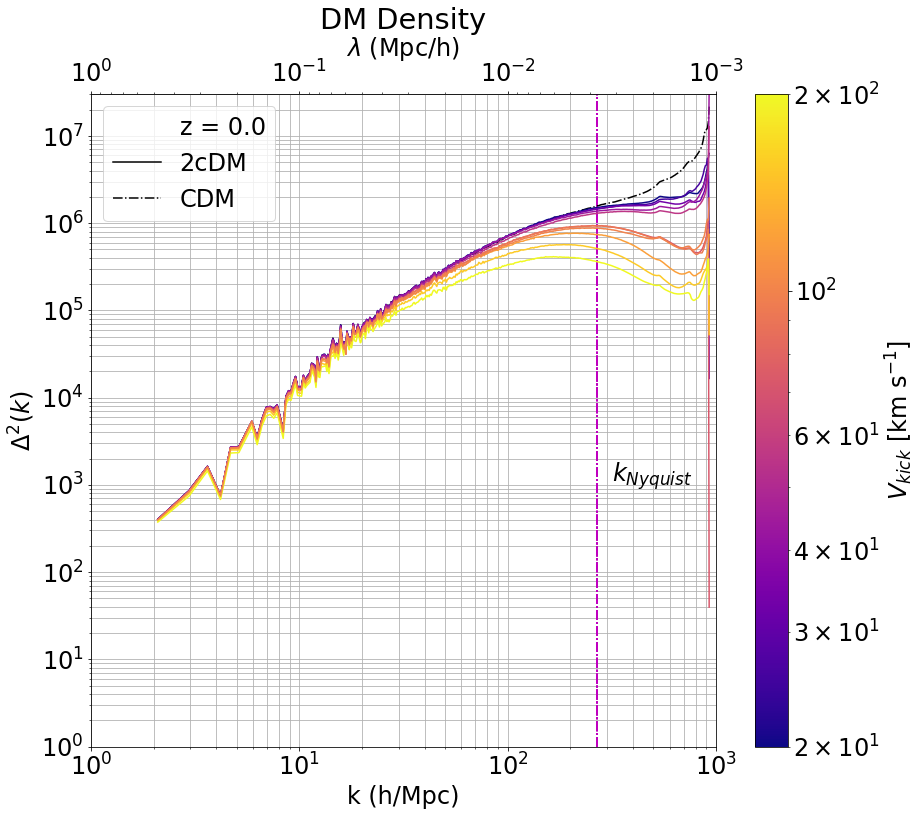

In [193]:
fig, ax = plt.subplots(1, 1, figsize=[14,12])

for i, run_n in enumerate(runs):

    run = cosmoSim(run_n)

    bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])

    if run.dm_type == '2cDM':
        ax.plot(bins, dk, alpha=ALPHA, color=s_map.to_rgba(run.Vkick))
    else:
        ax.plot(bins, dk, alpha=ALPHA, color='k', linestyle='dashdot')

    ax.vlines(k_ny, 10**0, 10**8, colors='m', linestyles='dashdot')


ax.text(k_ny + 0.5*10**2, 10**3 + 0.1*10**3, '$k_{Nyquist}$')


ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$\Delta^{2}(k)$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**0, 10**3)
ax.set_ylim(10**0, 10**7 + 2*10**7)
sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
ax.grid(True, which="both", ls="-")

ax.plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax.plot([],[], '-', label='2cDM', color='k')
ax.plot([],[], label='CDM', color='k', linestyle='dashdot')

ax.set_title('DM Density')

ax.legend()
fig.colorbar(s_map, label='$V_{kick}$ [km s$^{-1}$]')
fname = f'z_{run.redshifts[snap_no]}_Spectra_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


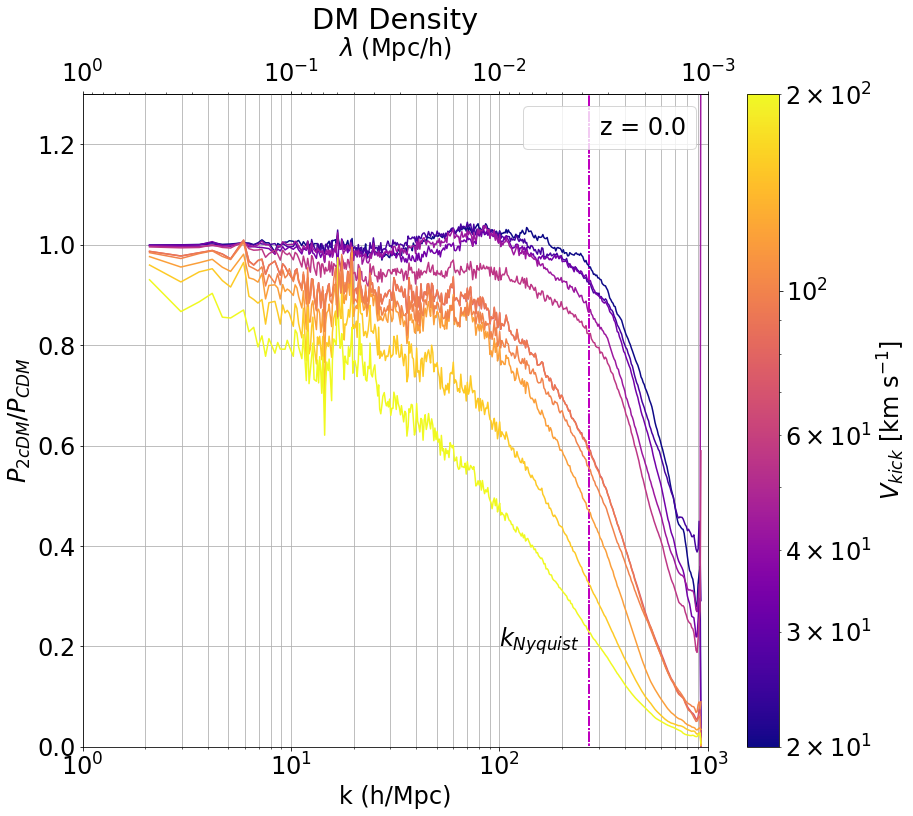

In [194]:
fig, ax = plt.subplots(1, 1, figsize=[14,12])

cdm_run = cosmoSim(CDM_runs[0])
for i, run_n in enumerate(tcDM_runs):

    run = cosmoSim(run_n)

    bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])
    
    
    cbins, cpk, cdk, ck_ny = cdm_run.load_power_spectra(run.redshifts[snap_no])
    ax.plot(bins, pk/cpk, alpha=ALPHA, color=s_map.to_rgba(run.Vkick))

    ax.vlines(k_ny, -3, 3, colors='m', linestyles='dashdot')



ax.text(10**2, 0.2, '$k_{Nyquist}$')


ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax.set_xscale('log')
ax.set_xlim(10**0, 10**3)
ax.set_ylim(0, 1.3)
sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
ax.grid(True, which="both", ls="-")

ax.plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)

ax.set_title('DM Density')

ax.legend()
fig.colorbar(s_map, label='$V_{kick}$ [km s$^{-1}$]')
fname = f'z_{run.redshifts[snap_no]}_ratio_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()